# **Preprocessing**

## Supervised

In [ ]:
# Load dataset
import pandas as pd
df_cancer = pd.read_csv("breast-cancer.csv")
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M':1, 'B':0}) # Change 'M' to 1, 'B' to 0

print(df_cancer.isna().sum()) # No NA values in set

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Find correlations for feature selection
cor = df_cancer.corr()['diagnosis'].drop('diagnosis')
print(abs(cor.values[1:11]) > abs(cor.values[11:21]))
print(abs(cor.values[11:21]) > abs(cor.values[21:31]))
print(abs(cor.values[1:11]) > abs(cor.values[21:31]))
print(df_cancer.columns)

[ True  True  True  True  True  True  True  True  True False]
[False False False False False False False False False False]
[False False False False False  True  True False False False]
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Finding Information Gain


# Split into features & target
X, y = df_cancer.loc[:, df_cancer.columns != 'diagnosis'], df_cancer['diagnosis']

# Now, find if each feature has significant information gain
from sklearn.feature_selection import mutual_info_regression
import numpy as np
ig = np.array(mutual_info_regression(X, y))
mean = np.mean(ig)
new = ig > mean
names = df_cancer.columns.drop('diagnosis')
df = pd.DataFrame({'Feature': names, 'IG': new})
print(df)

selected_set = df_cancer[['diagnosis', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_mean', 'concavity_mean',
       'concave points_worst']]

                    Feature     IG
0                        id  False
1               radius_mean   True
2              texture_mean  False
3            perimeter_mean   True
4                 area_mean   True
5           smoothness_mean  False
6          compactness_mean   True
7            concavity_mean   True
8       concave points_mean   True
9             symmetry_mean  False
10   fractal_dimension_mean  False
11                radius_se   True
12               texture_se  False
13             perimeter_se   True
14                  area_se   True
15            smoothness_se  False
16           compactness_se  False
17             concavity_se  False
18        concave points_se  False
19              symmetry_se  False
20     fractal_dimension_se  False
21             radius_worst   True
22            texture_worst  False
23          perimeter_worst   True
24               area_worst   True
25         smoothness_worst  False
26        compactness_worst   True
27          concavit

In [ ]:
# Finding extreme outliers only
Q1 = selected_set.quantile(0.25)
Q3 = selected_set.quantile(0.75)
IQR = Q3 - Q1
outliers = (selected_set < (Q1 - 3 * IQR)) | (selected_set > (Q3 + 3 * IQR))
print(outliers.sum()) # Ensure sum of outliers is not too large

# Remove outliers
for j in selected_set.columns:
    for i in selected_set.index:
        if (outliers.loc[i, j] == True):
            selected_set = selected_set.drop(i)


diagnosis               0
radius_worst            0
perimeter_worst         1
area_worst              7
compactness_mean        1
concavity_mean          0
concave points_worst    0
dtype: int64


In [ ]:
# Split into features & target for the selected_data
X, y = selected_set.loc[:, selected_set.columns != 'diagnosis'], selected_set['diagnosis']

# Split the data into train and test sets with the 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Data Exploration


In [ ]:
# Data Exploration with selected features

selected_columns = [
    'radius_worst',
    'perimeter_worst',
    'area_worst',
    'compactness_mean',
    'concavity_mean',
    'concave points_worst'
]

# binned continuous variables
for col in selected_columns:
    binned = pd.cut(selected_set[col], bins=5)
    print(f"\nFrequency of {col} (binned):")
    print(pd.crosstab(binned, selected_set['diagnosis']))
    x = pd.crosstab(binned, selected_set['diagnosis'])




Frequency of radius_worst (binned):
diagnosis           0   1
radius_worst             
(7.907, 12.502]   114   0
(12.502, 17.074]  234  40
(17.074, 21.646]    9  83
(21.646, 26.218]    0  66
(26.218, 30.79]     0  15

Frequency of perimeter_worst (binned):
diagnosis             0   1
perimeter_worst            
(50.249, 82.668]    124   0
(82.668, 114.926]   228  42
(114.926, 147.184]    5  88
(147.184, 179.442]    0  60
(179.442, 211.7]      0  14

Frequency of area_worst (binned):
diagnosis             0   1
area_worst                 
(182.603, 704.56]   289   8
(704.56, 1223.92]    68  79
(1223.92, 1743.28]    0  74
(1743.28, 2262.64]    0  33
(2262.64, 2782.0]     0  10

Frequency of compactness_mean (binned):
diagnosis           0   1
compactness_mean         
(0.0191, 0.0778]  196  17
(0.0778, 0.136]   142  91
(0.136, 0.195]     15  63
(0.195, 0.253]      4  24
(0.253, 0.311]      0   9

Frequency of concavity_mean (binned):
diagnosis              0    1
concavity_mean        

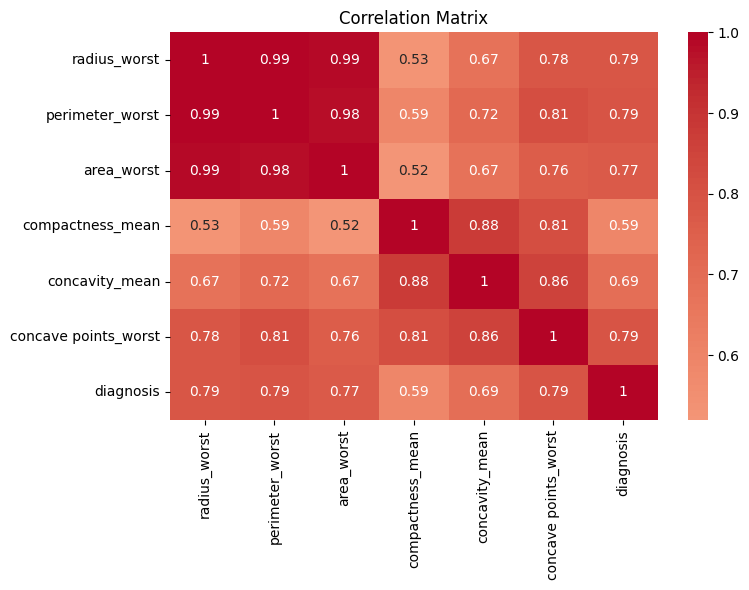

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Append the target selected columns
corr_cols = selected_columns + ['diagnosis']
corr = selected_set[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Unsupervised

In [ ]:
# Re-loading data
df_cancer = pd.read_csv('breast-cancer.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
# Subgroup
subgroup = df_cancer[df_cancer['diagnosis'] == 'M']

# Dropping columns
features = subgroup.drop(columns=['id', 'diagnosis'])

# Rescale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [ ]:
# K-mean Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Clusters
scaled_df['Cluster'] = clusters
scaled_df['Cluster']

,Cluster
0,1
1,0
2,1
3,2
4,1
...,...
207,1
208,1
209,0
210,0


# **Modeling**

## Supervised models that predict target attribute

In [ ]:
# Decision trees
from sklearn.tree import DecisionTreeClassifier

decision_tree1 = DecisionTreeClassifier(max_depth = 4, criterion= "entropy", random_state=42)
treemodel1 = decision_tree1.fit(X_train, y_train)

predictions_tree1 = treemodel1.predict(X_test)

## Evaluation 1 - Decision tree max_depth = 4
from sklearn.metrics import accuracy_score

accuracy1=accuracy_score(y_test, predictions_tree1)
accuracy1

0.9469026548672567

In [ ]:
treemodel1.feature_names_in_

array(['radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_mean', 'concavity_mean', 'concave points_worst'],
      dtype=object)

[Text(0.6, 0.9, 'radius_worst <= 16.795\nentropy = 0.928\nsamples = 448\nvalue = [294, 154]\nclass = Benign'),
 Text(0.3333333333333333, 0.7, 'concave points_worst <= 0.136\nentropy = 0.393\nsamples = 310\nvalue = [286, 24]\nclass = Benign'),
 Text(0.4666666666666667, 0.8, 'True  '),
 Text(0.13333333333333333, 0.5, 'area_worst <= 553.3\nentropy = 0.13\nsamples = 278\nvalue = [273, 5]\nclass = Benign'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.0\nsamples = 150\nvalue = [150, 0]\nclass = Benign'),
 Text(0.2, 0.3, 'area_worst <= 554.25\nentropy = 0.238\nsamples = 128\nvalue = [123, 5]\nclass = Benign'),
 Text(0.13333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Malignant'),
 Text(0.26666666666666666, 0.1, 'entropy = 0.202\nsamples = 127\nvalue = [123, 4]\nclass = Benign'),
 Text(0.5333333333333333, 0.5, 'concave points_worst <= 0.172\nentropy = 0.974\nsamples = 32\nvalue = [13, 19]\nclass = Malignant'),
 Text(0.4666666666666667, 0.3, 'area_worst <= 724.85\nen

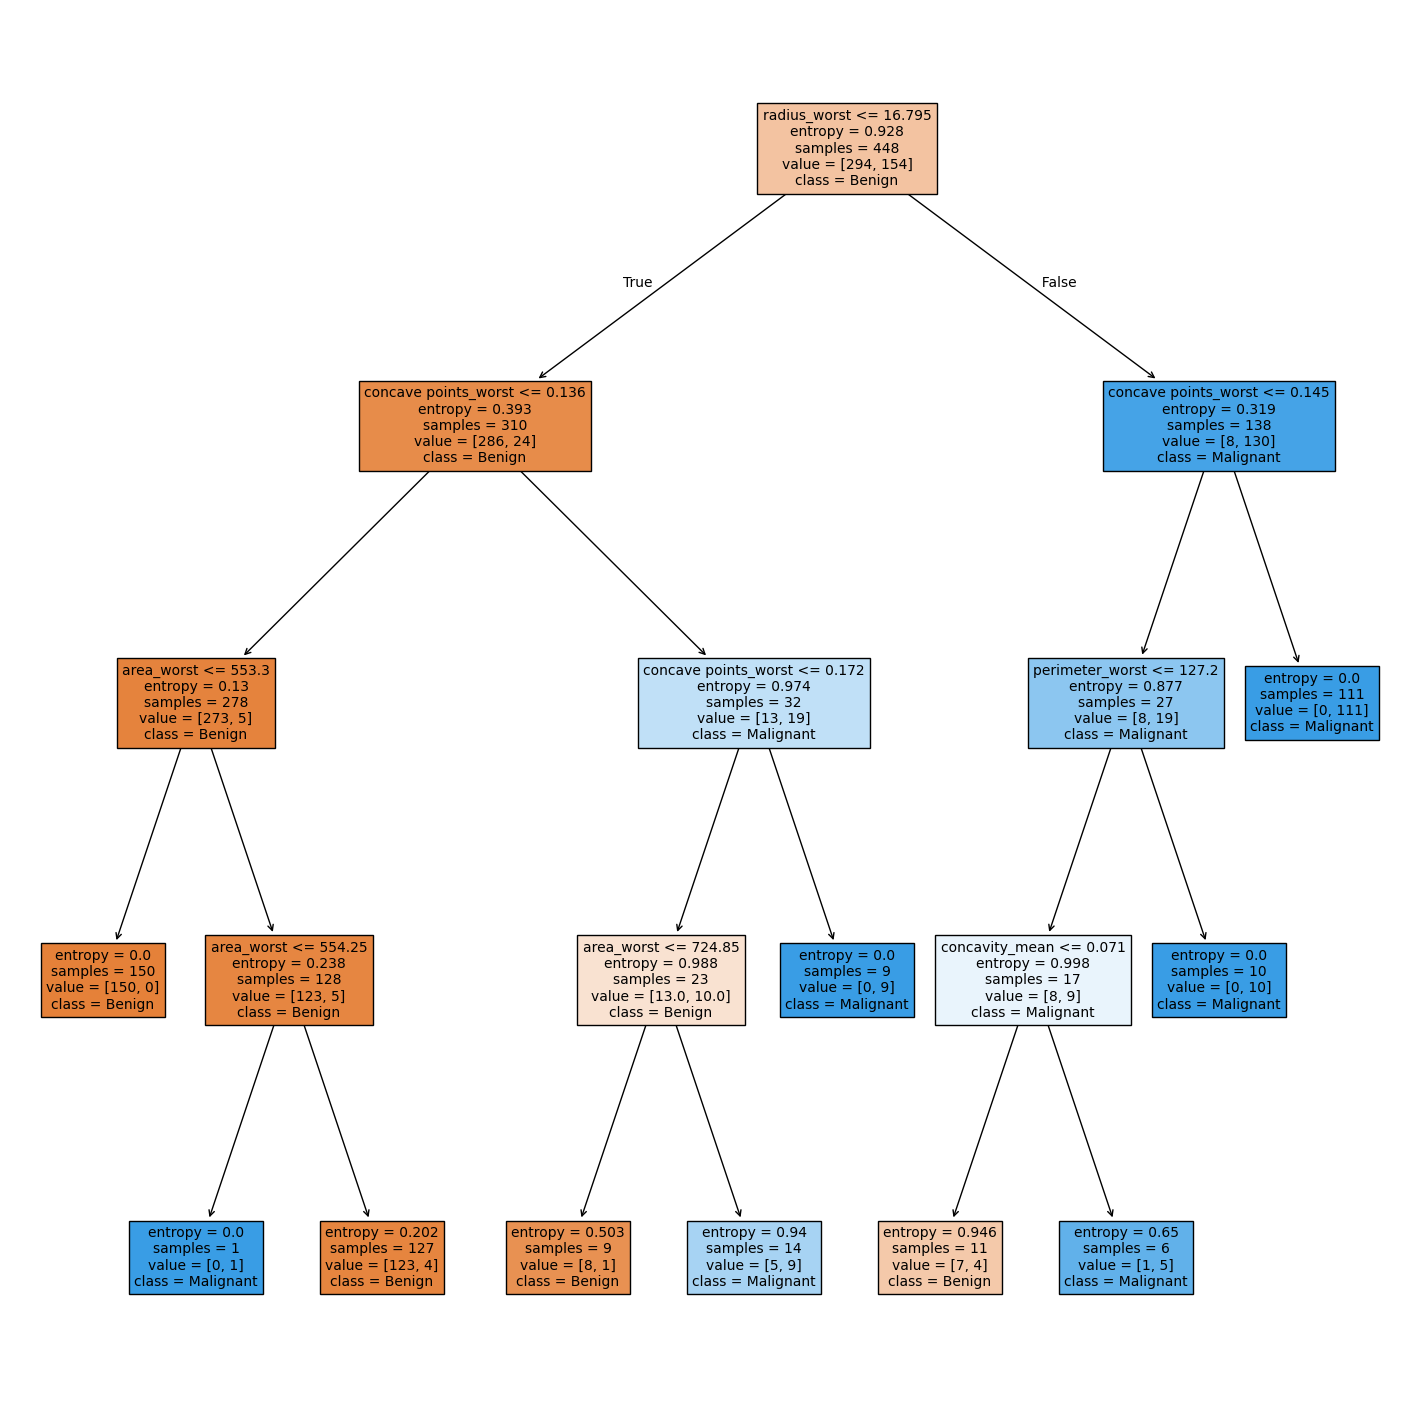

In [ ]:
## Plotting the tree with depth 4 due to higher accuracy
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))
plot_tree(treemodel1, feature_names = treemodel1.feature_names_in_,
               class_names=("Benign", "Malignant"),
               filled = True,fontsize=10)


In [ ]:
## Evaluation 2 - Decision tree max_depth = 5
decision_tree2 = DecisionTreeClassifier(max_depth = 5, criterion= "entropy", random_state=42)
treemodel2 = decision_tree2.fit(X_train, y_train)

predictions_tree2 = treemodel2.predict(X_test)

accuracy2=accuracy_score(y_test, predictions_tree2)
accuracy2

0.911504424778761

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forestmodel1 = RandomForestClassifier(criterion="gini", random_state=42)
forestmodel1.fit(X_train, y_train)

y_pred1 = forestmodel1.predict(X_test)

## Evaluation 1 - Random forest criterion = "gini"
accuracy_score(y_test, y_pred1)


0.9380530973451328

In [ ]:
## Evaluation 2 - Random forest criterion = "entropy"
forestmodel2 = RandomForestClassifier(criterion="entropy", random_state=42)
forestmodel2.fit(X_train, y_train)

y_pred2 = forestmodel2.predict(X_test)

accuracy_score(y_test, y_pred2)

0.9557522123893806

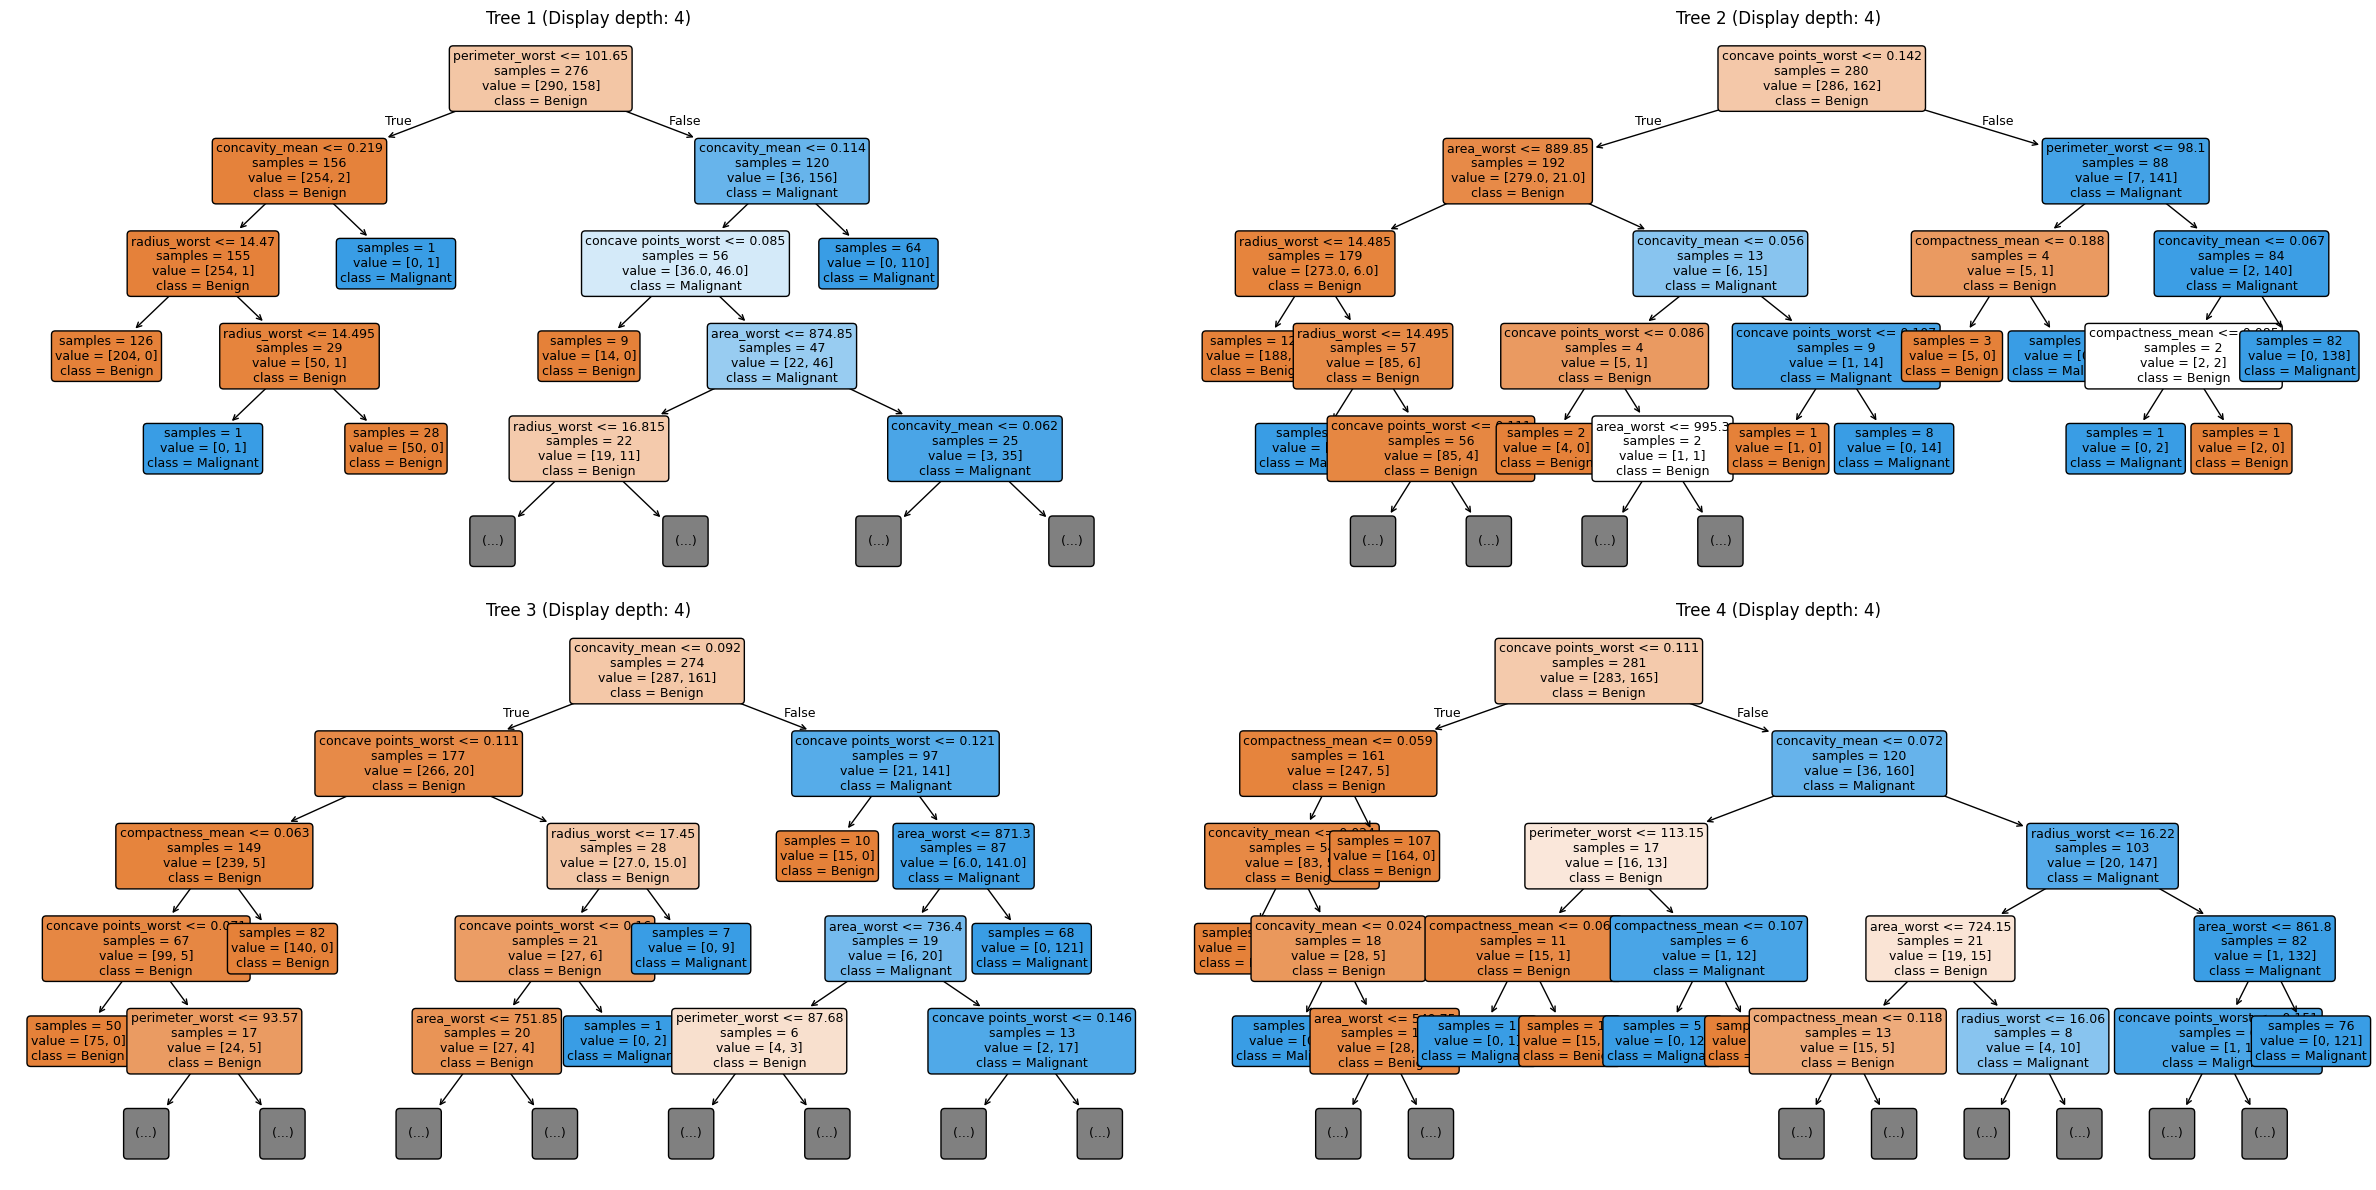

In [ ]:
## Plotting Random Forest with criterion = "entropy"
plt.figure(figsize=(24, 12))
max_display_depth = 4

for i, tree_in_forest in enumerate(forestmodel2.estimators_[:4]):
    plt.subplot(2, 2, i+1)
    plot_tree(tree_in_forest,
              feature_names=forestmodel2.feature_names_in_,
              class_names=("Benign", "Malignant"),
              filled=True,
              rounded=True,
              max_depth=max_display_depth,
              impurity=False,
              fontsize=9)
    plt.title(f'Tree {i+1} (Display depth: {max_display_depth})')
plt.tight_layout()
plt.show()




Display depth 4 due to default depths making the plot unreadable

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression(random_state=42, max_iter=25)
lr = logisticmodel.fit(X_train, y_train)

logisticpred = logisticmodel.predict(X_test)

## Evaluation - Logistic Regression
accuracy_score(y_test, logisticpred)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9026548672566371

In [ ]:
## Logistic model coefficients
lr.coef_

array([[-2.3962,  0.1947,  0.0219,  0.2179,  0.3007,  0.2729]])

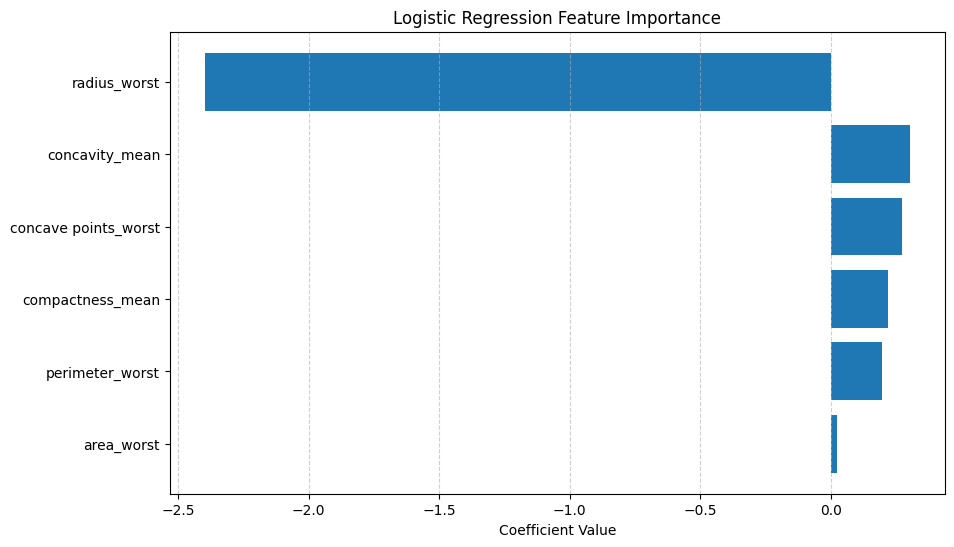

In [ ]:
## Plotting Logistic Regression feature importance
# Get coefficients and feature names
coefficients = logisticmodel.coef_[0]
feature_names = logisticmodel.feature_names_in_

# Sort features by absolute coefficient value
sorted_idx = np.argsort(np.abs(coefficients))
sorted_coef = coefficients[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coef)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()





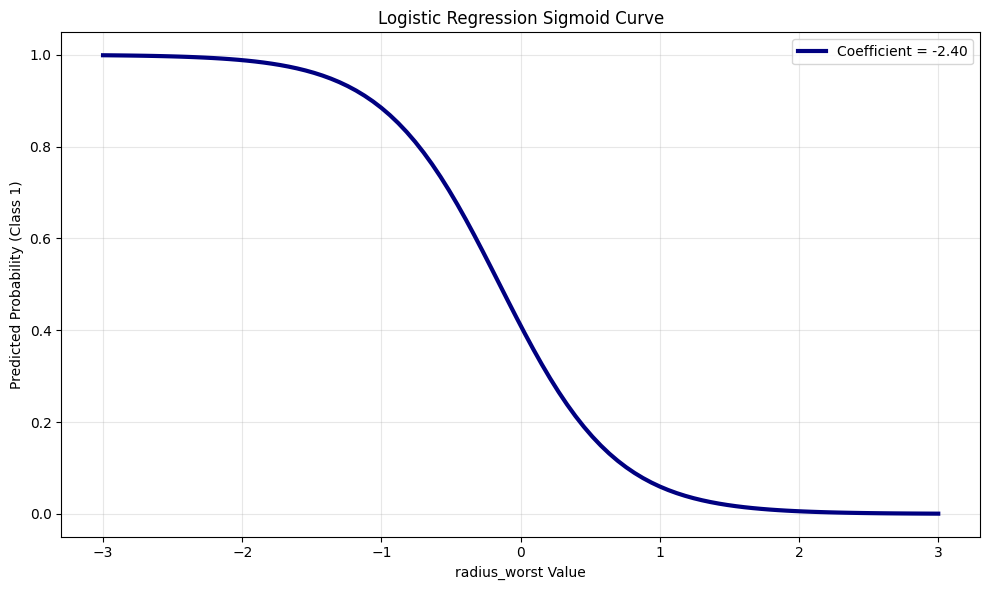

In [ ]:
## Plotting Logistic Regression curve
import numpy as np
import matplotlib.pyplot as plt

# SAFE FEATURE SELECTION
try:
    # Pandas DataFrame
    if hasattr(X_train, 'iloc'):
        feature_name = X_train.columns[feature_idx]
        feature_values = X_train.iloc[:, feature_idx]
    # NumPy array
    else:
        feature_name = f"Feature {feature_idx}"
        feature_values = X_train[:, feature_idx]
except Exception as e:
    print(f"Error accessing feature: {e}")
    # Fallback to first feature
    feature_idx = 0
    feature_values = X_train.iloc[:, feature_idx] if hasattr(X_train, 'iloc') else X_train[:, feature_idx]
    feature_name = getattr(X_train, 'columns', [f"Feature {feature_idx}"])[feature_idx]

# GENERATE X VALUES (using percentiles)
x_range = np.percentile(feature_values, [1, 99])  # 1st to 99th percentile
x_values = np.linspace(-3, 3, 100)

# PROBABILITIES
log_odds = logisticmodel.intercept_[0] + logisticmodel.coef_[0][feature_idx] * x_values
probabilities = 1 / (1 + np.exp(-log_odds))

# PLOT
plt.figure(figsize=(10, 6))
plt.plot(x_values, probabilities,
         color='navy',
         linewidth=3,
         label=f"Coefficient = {logisticmodel.coef_[0][feature_idx]:.2f}")

plt.xlabel(f"{feature_name} Value")
plt.ylabel("Predicted Probability (Class 1)")
plt.title("Logistic Regression Sigmoid Curve")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
dummymodel = DummyClassifier(random_state=42)
dummymodel.fit(X_train, y_train)

dummypred = dummymodel.predict(X_test)

accuracy_score(y_test, dummypred)

0.5575221238938053

## Clustering models for chosen subset

In [ ]:
# Flat - KMeans clustering with Scaled and Subgrouped features
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

clusters=kmeans.fit_predict(scaled_features)

# Evaluation - Kmeans n_clusters=2
kmeans.inertia_


5114.88496583884

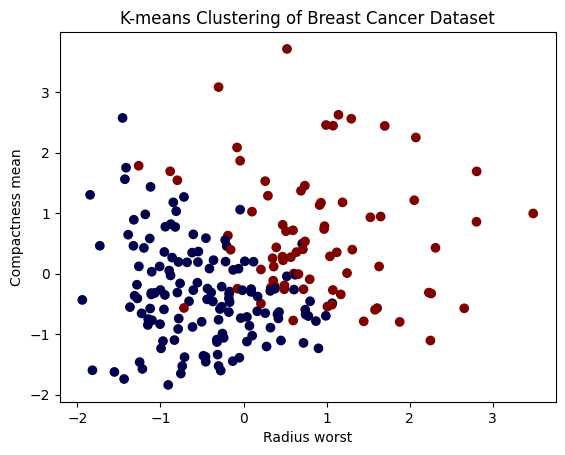

In [ ]:
# Plot - Kmeans n_clusters=2

plt.scatter(scaled_df["radius_worst"], scaled_df["compactness_mean"], c=clusters, cmap= "seismic")
plt.xlabel('Radius worst')
plt.ylabel('Compactness mean')
plt.title('K-means Clustering of Breast Cancer Dataset')
plt.show()


In [ ]:
# Evaluation - Kmeans n_clusters=5
from sklearn import metrics

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)


metrics.rand_score(kmeans.labels_, subgroup['diagnosis'])

np.float64(0.2364302959849772)

In [ ]:
kmeans.inertia_

3523.789981953034

In [ ]:
# Evaluation - Kmeans n_clusters=2 with scaled non-subgrouped data
kmeansog = KMeans(n_clusters=2, random_state=42)

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

kmeansog.fit(X_scaled)

metrics.rand_score(kmeansog.labels_, y)

np.float64(0.8827985739750446)

In [ ]:
kmeansog.inertia_

1353.5871603085109

As we can see, the results are significantly better compared to the model that used subgrouped data.

Both the Rand score and cluster inertia have improved to an acceptable level.

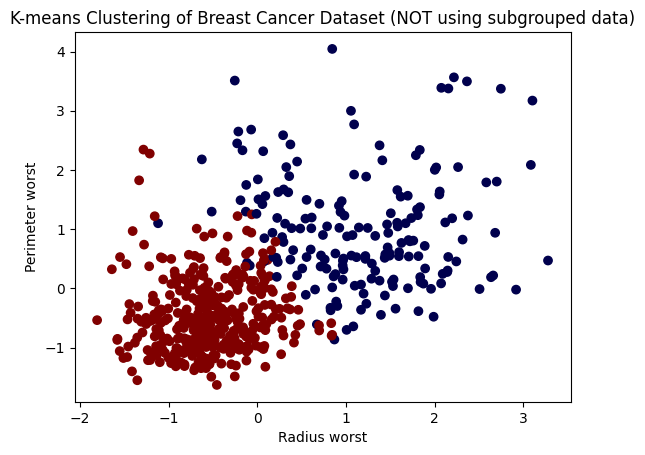

In [ ]:
plt.scatter(X_scaled_df["radius_worst"], X_scaled_df["compactness_mean"], c=kmeansog.labels_, cmap= "seismic")
plt.xlabel('Radius worst')
plt.ylabel('Perimeter worst')
plt.title('K-means Clustering of Breast Cancer Dataset (NOT using subgrouped data)')
plt.show()

In [ ]:
# Hierarchical - Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

aggclustering = AgglomerativeClustering(n_clusters=2, compute_distances=True)
aggclustering.fit(df_cancer[['radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_mean', 'concavity_mean',
       'concave points_worst']])

# Evaluation - Agglomerative Clustering with default euclidean metric
from sklearn import metrics

metrics.rand_score(aggclustering.labels_, df_cancer['diagnosis'])

np.float64(0.7707245228842298)

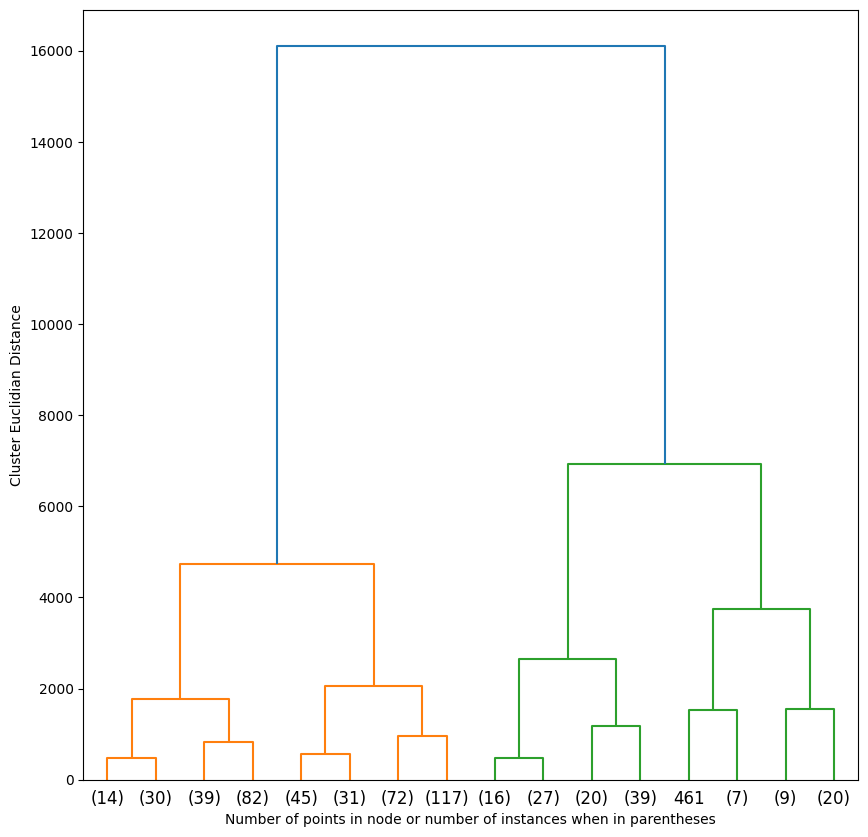

In [ ]:
# Hiearchical clustering plot
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

fig = plt.figure(figsize=(10,10))
plt.xlabel("Number of points in node or number of instances when in parentheses")
plt.ylabel("Cluster Euclidian Distance")

plot_dendrogram(aggclustering, truncate_mode="level", p=3, orientation='top',leaf_font_size=12)

It is logical we would only use 2 clusters to have the best "accuracy", since we have a binary target attribute.

Note: There is a node with 461 data points, which might be noise or represent the "obviously healthy/ill" group

In [ ]:
# Evaluation - Agglomerative Clustering with metric = "cosine" and linkage = "complete"
aggclustering = AgglomerativeClustering(n_clusters=2, metric="cosine", linkage = "complete")
aggclustering.fit(df_cancer[['radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_mean', 'concavity_mean',
       'concave points_worst']])

metrics.rand_score(aggclustering.labels_, df_cancer['diagnosis'])

np.float64(0.6178246986311542)

# **Evaluation**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate one model
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    return acc, prec, rec, f1, cm

# Evaluation of all our models
results = {}

results["Decision Tree (max_depth=4, predictions_tree1)"] = evaluate_model(y_test, predictions_tree1)
results["Decision Tree (max_depth=5, predictions_tree2)"] = evaluate_model(y_test, predictions_tree2)
results["Random Forest (criterion='gini', y_pred1)"] = evaluate_model(y_test, y_pred1)
results["Random Forest (criterion='entropy', y_pred2)"] = evaluate_model(y_test, y_pred2)
results["Logistic Regression (logisticpred)"] = evaluate_model(y_test, logisticpred)
results["Dummy Classifier (dummypred)"] = evaluate_model(y_test, dummypred)

# Dataframe
summary = []

for model_name, (acc, prec, rec, f1, cm) in results.items():
    summary.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

eval_df = pd.DataFrame(summary)
print(eval_df)



                                            Model  Accuracy  Precision  \
0  Decision Tree (max_depth=4, predictions_tree1)  0.946903   0.923077   
1  Decision Tree (max_depth=5, predictions_tree2)  0.911504   0.916667   
2       Random Forest (criterion='gini', y_pred1)  0.938053   0.921569   
3    Random Forest (criterion='entropy', y_pred2)  0.955752   0.959184   
4              Logistic Regression (logisticpred)  0.902655   0.933333   
5                    Dummy Classifier (dummypred)  0.557522   0.000000   

   Recall  F1-score  
0    0.96  0.941176  
1    0.88  0.897959  
2    0.94  0.930693  
3    0.94  0.949495  
4    0.84  0.884211  
5    0.00  0.000000  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For medical data like this, the recall metric is crucial as it tells us how many actual malignant cases are correctly found.
However, precision is also important as we can not have many false positive cases.
Therefore, F1-score would be the preferable choice, as it is a harmonic mean between the precision and recall.
From the results, model 3 looks the best. However, we could also decide to use model 0 if we really want to minimaze the chances of not diagnosing an actual malignant case. Although it is a trade of for more false positives.

In [ ]:
# Cost
cost_matrix = np.array([[0, 10],
                        [50, 0]])

costs = []
for model_name, values in results.items():
    cm = values[4]
    cost = (cm * cost_matrix).sum()
    costs.append({"Model": model_name, "Total Cost": cost})

pd.DataFrame(costs)


,Model,Total Cost
0,"Decision Tree (max_depth=4, predictions_tree1)",140
1,"Decision Tree (max_depth=5, predictions_tree2)",340
2,"Random Forest (criterion='gini', y_pred1)",190
3,"Random Forest (criterion='entropy', y_pred2)",170
4,Logistic Regression (logisticpred),430
5,Dummy Classifier (dummypred),2500


In terms of cost, the best model is model 0. This is the case if we make the costs for FP=10 and for FN=50, which should be pretty standard in medical field.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score

# Models 0–5
model_defs = [
    ("Decision Tree (depth=4)", treemodel1),
    ("Decision Tree (depth=5)", treemodel2),
    ("Random Forest (gini)", forestmodel1),
    ("Random Forest (entropy)", forestmodel2),
    ("Logistic Regression", logisticmodel),
    ("Dummy Classifier", dummymodel)
]

# Thresholds and cost matrix
thresholds = np.arange(0.1, 1.0, 0.1)
cost_fp = 10
cost_fn = 50

# Metrics for every threshold
def compute_costs_with_f1(y_true, probs, thresholds, model_name):
    results = []
    for thresh in thresholds:
        preds = (probs >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        total_cost = (fp * cost_fp) + (fn * cost_fn)
        f1 = f1_score(y_true, preds)
        results.append({
            "Model": model_name,
            "Threshold": round(thresh, 2),
            "FP": fp,
            "FN": fn,
            "Total Cost": total_cost,
            "F1-score": round(f1, 3)
        })
    return results

# For every model, using predict_proba
all_results = []
for name, model in model_defs:
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        all_results.extend(compute_costs_with_f1(y_test, probs, thresholds, name))

# Results DataFrame
all_threshold_df = pd.DataFrame(all_results)
print(all_threshold_df)



                      Model  Threshold  FP  FN  Total Cost  F1-score
0   Decision Tree (depth=4)        0.1   9   0          90     0.917
1   Decision Tree (depth=4)        0.2   6   0          60     0.943
2   Decision Tree (depth=4)        0.3   6   0          60     0.943
3   Decision Tree (depth=4)        0.4   4   2         140     0.941
4   Decision Tree (depth=4)        0.5   4   2         140     0.941
5   Decision Tree (depth=4)        0.6   4   2         140     0.941
6   Decision Tree (depth=4)        0.7   3   5         280     0.918
7   Decision Tree (depth=4)        0.8   3   5         280     0.918
8   Decision Tree (depth=4)        0.9   2   7         370     0.905
9   Decision Tree (depth=5)        0.1   7   5         320     0.882
10  Decision Tree (depth=5)        0.2   7   5         320     0.882
11  Decision Tree (depth=5)        0.3   7   5         320     0.882
12  Decision Tree (depth=5)        0.4   7   5         320     0.882
13  Decision Tree (depth=5)       

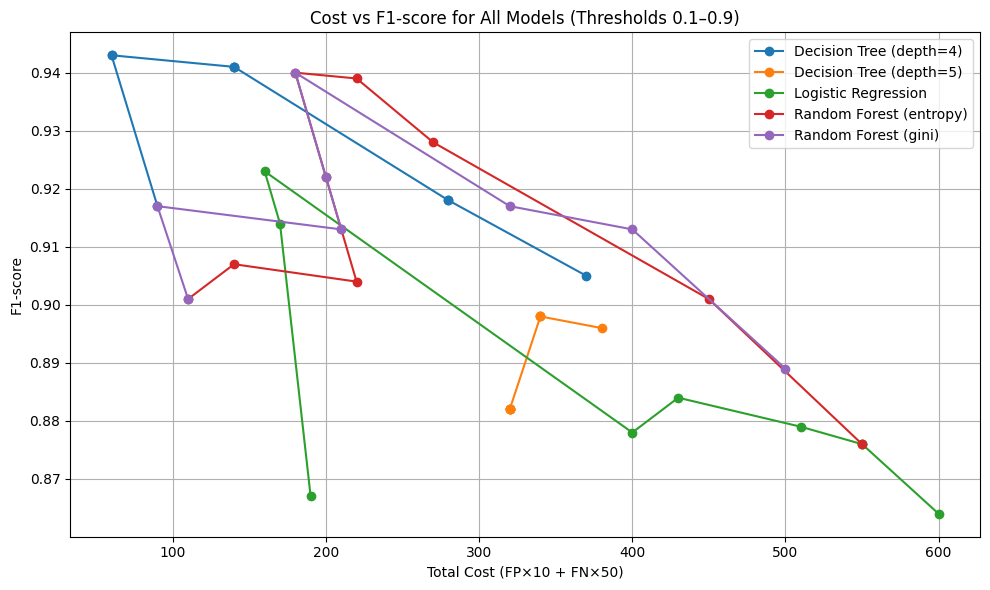

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Thresholds and cost settings
thresholds = np.arange(0.1, 1.0, 0.1)
cost_fp = 10
cost_fn = 50

# Compute for all non-dummy models
all_model_results = []

all_model_results += compute_costs_with_f1(y_test, treemodel1.predict_proba(X_test)[:, 1], thresholds, "Decision Tree (depth=4)")
all_model_results += compute_costs_with_f1(y_test, treemodel2.predict_proba(X_test)[:, 1], thresholds, "Decision Tree (depth=5)")
all_model_results += compute_costs_with_f1(y_test, forestmodel1.predict_proba(X_test)[:, 1], thresholds, "Random Forest (gini)")
all_model_results += compute_costs_with_f1(y_test, forestmodel2.predict_proba(X_test)[:, 1], thresholds, "Random Forest (entropy)")
all_model_results += compute_costs_with_f1(y_test, logisticmodel.predict_proba(X_test)[:, 1], thresholds, "Logistic Regression")

# Combine into DataFrame
df_f1_cost = pd.DataFrame(all_model_results)

# Plot
plt.figure(figsize=(10, 6))
for model_name, group in df_f1_cost.groupby("Model"):
    plt.plot(group["Total Cost"], group["F1-score"], marker='o', label=model_name)

plt.title("Cost vs F1-score for All Models (Thresholds 0.1–0.9)")
plt.xlabel("Total Cost (FP×10 + FN×50)")
plt.ylabel("F1-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


As we can see in the dataframe and also this graph, we could obtain better results in terms of total cost by changing the treshold. Also, the F1 measure seems to be great a lot of the time. All of this happens with tresholds smaller than 0.5 for the majority of our models.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Without Scaling
log_unscaled = LogisticRegression(random_state=42, max_iter=200)
log_unscaled.fit(X_train, y_train)
y_pred_unscaled = log_unscaled.predict(X_test)

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_scaled = LogisticRegression(random_state=42, max_iter=200)
log_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = log_scaled.predict(X_test_scaled)

# Evaluate both
comparison = {
    "Model": ["Logistic Regression (unscaled)", "Logistic Regression (scaled)"],
    "Accuracy": [accuracy_score(y_test, y_pred_unscaled), accuracy_score(y_test, y_pred_scaled)],
    "Precision": [precision_score(y_test, y_pred_unscaled), precision_score(y_test, y_pred_scaled)],
    "Recall": [recall_score(y_test, y_pred_unscaled), recall_score(y_test, y_pred_scaled)],
    "F1-score": [f1_score(y_test, y_pred_unscaled), f1_score(y_test, y_pred_scaled)]
}

df_compare = pd.DataFrame(comparison)
print(df_compare)


                            Model  Accuracy  Precision  Recall  F1-score
0  Logistic Regression (unscaled)  0.893805   0.913043    0.84  0.875000
1    Logistic Regression (scaled)  0.938053   0.938776    0.92  0.929293


Comparison of the logistic regression model scaled and unscaled. As we can see, the model is better in every metric when the data is scaled.

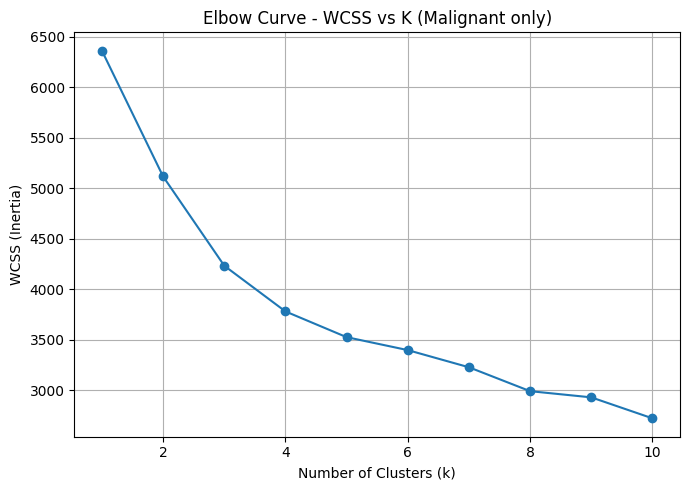

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Curve using chosen subset
wcss_subset = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Your subset (malignant only), already scaled
    wcss_subset.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(K_range, wcss_subset, marker='o')
plt.title("Elbow Curve - WCSS vs K (Malignant only)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.tight_layout()
plt.show()


From the WCSS curve, we can se that 2 clusters should work fine.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

print("KMeans Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_score(scaled_features, kmeans_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(scaled_features, kmeans_labels):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(scaled_features, kmeans_labels):.3f}")
print()

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(scaled_features)

print("Agglomerative Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_score(scaled_features, agg_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(scaled_features, agg_labels):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(scaled_features, agg_labels):.3f}")


KMeans Clustering Evaluation:
Silhouette Score: 0.208
Davies-Bouldin Index: 1.837
Calinski-Harabasz Score: 51.120

Agglomerative Clustering Evaluation:
Silhouette Score: 0.169
Davies-Bouldin Index: 1.969
Calinski-Harabasz Score: 44.779


Unfortunately, if we evaluate the quality of clustering, it is not really high. Therefore, the clustering is not really that useful.

# **Explanation**

## Supervised model

Identifying the most important variables

The most important variables were:


*   radius_worst
*   perimeter_worst
*   area_worst
*   compactness_mean
*   concavity_mean
*   concave points_worts

i.Explain how the decision tree model reached its conclusion

We trained decision tree with maximum depth of 4 using selected key features. Using plot_tree(), we visualized prediction for specific instance.
Model makes decisions going through nodes, where each node represents a condition based on threshold, for example:
*  radius_worst <= threshold
*  concavity_mean > threshold

At each node, model evaluates the condition and moves either left or right based on if the condition is met or not. This process continues until the instance reaches a leaf node.



i.Do both assign the same class?

In [ ]:

instance = X_test.iloc[[0]]
tree_pred = treemodel1.predict(instance)
rf_pred = forestmodel1.predict(instance)

print("Decision Tree prediction:", tree_pred[0])
print("Random Forest prediction:", rf_pred[0])



Decision Tree prediction: 1
Random Forest prediction: 1


They both equal 1, so they both assign the same class.

ii. What is the confidence(probability) of prediction?

In [ ]:
treemodel1.predict_proba(instance)
forestmodel1.predict_proba(instance)


array([[0., 1.]])

Model predicted Malignant (class 1) with confidence 100%

If you would change the value of the attribute of interest, how would the classification of the instance change?

In [ ]:
modified_instance = X_test.iloc[0].copy()
modified_instance['concave points_worst'] += 0.2
treemodel1.predict(modified_instance.to_frame().T)



array([1])

Even after increasing value of 'concavve points_worse', class 1 (Malignant) is still predicted by the model

In [ ]:
!pip install lime


 Apply LIME, SHAPLEY or Anchors to explain the classification of the instance

In [ ]:
import lime.lime_tabular
import numpy as np


index = 0
lime_instance = scaled_features[index]


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=scaled_features,
    feature_names=features.columns,
    class_names=[f'Cluster {i}' for i in range(kmeans.n_clusters)],
    mode='classification'
)


def kmeans_predict_proba(X):
    distances = kmeans.transform(X)
    inverted = 1 / (distances + 1e-10)
    probs = inverted / inverted.sum(axis=1, keepdims=True)
    return probs


explanation = explainer.explain_instance(lime_instance, kmeans_predict_proba, num_features=5)
explanation.show_in_notebook()







## Unsupervised model

Interpret the final clusters based on their centroids and the number of instances in each cluster.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)


centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(centroids)

cluster_labels = kmeans.labels_
pd.Series(cluster_labels).value_counts()




   radius_worst  perimeter_worst   area_worst  compactness_mean  \
0     23.030465       153.713953  1642.100775          0.145084   
1     13.971433        91.456088   612.196296          0.090708   

   concavity_mean  concave points_worst  
0        0.169238              0.188403  
1        0.061697              0.090354  


,count
1,432
0,129


b. Use the model to classify the chosen instance into a cluster

In [ ]:
index = 0

instance_cluster = scaled_df.loc[index, 'Cluster']
print(f"Instance with index {index} was assigned to cluster number {instance_cluster}.")


Instance with index 0 was assigned to cluster number 1.


i. Inspect the assigned cluster.

In [ ]:
from scipy.stats import norm
cluster_members = scaled_df[scaled_df['Cluster'] == instance_cluster]

# Find z-scores and then their CDF probabilities
z_score = (scaled_df.iloc[0] - cluster_members.mean(numeric_only=True)) / cluster_members.std(numeric_only=True)
norm = np.round(norm.cdf(z_score), 4)
np.set_printoptions(suppress=True, precision=4)

# Create a df with the mean feature values in cluster, with their CDF values
df = pd.DataFrame({
    'Features': cluster_members.mean(numeric_only=True).index.tolist(),
    'Values': cluster_members.mean(numeric_only=True).values.tolist(),
    'CDF': norm
})

print(df.sort_values(by='CDF', ascending=False))

                   Features    Values     CDF
9    fractal_dimension_mean  0.092905  0.9862
28           symmetry_worst -0.039288  0.9681
29  fractal_dimension_worst -0.039980  0.9627
5          compactness_mean  0.663613  0.9618
25        compactness_worst  0.240112  0.9536
8             symmetry_mean  0.290382  0.8965
27     concave points_worst  0.757774  0.8929
26          concavity_worst  0.418651  0.8782
24         smoothness_worst -0.061370  0.8697
4           smoothness_mean  0.290013  0.8640
6            concavity_mean  0.883947  0.8387
7       concave points_mean  1.013721  0.7769
12             perimeter_se  0.958706  0.7172
18              symmetry_se  0.301676  0.7077
19     fractal_dimension_se  0.436664  0.7013
22          perimeter_worst  1.026318  0.6947
10                radius_se  0.942969  0.6549
15           compactness_se  0.512653  0.6477
13                  area_se  0.889278  0.6239
23               area_worst  0.965518  0.5136
20             radius_worst  0.975

ii.

In [ ]:
import numpy as np


if 'diagnosis' not in scaled_df.columns:
    scaled_df['diagnosis'] = subgroup['diagnosis'].reset_index(drop=True)


instance_diagnosis = scaled_df.loc[index, 'diagnosis']


cluster_members = scaled_df[scaled_df['Cluster'] == scaled_df.loc[index, 'Cluster']]


cluster_mode = np.unique(cluster_members['diagnosis'])[0]


print(f"Diagnosis value for the instance: {instance_diagnosis}")
print(f"Mode of the target class in the cluster: {cluster_mode}")
if instance_diagnosis == cluster_mode:
    print("The value matches the mode of the cluster")
else:
    print("The value does NOT match the mode of the cluster")





Diagnosis value for the instance: M
Mode of the target class in the cluster: M
The value matches the mode of the cluster


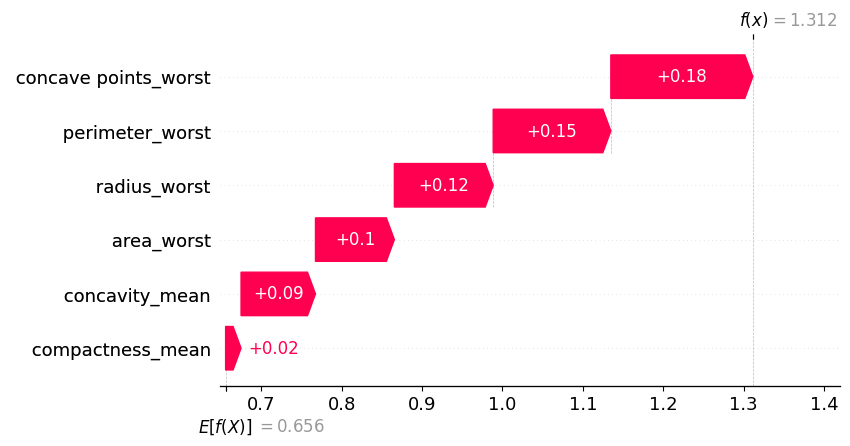

In [ ]:
# SHAP
import shap
# Create SHAP explainer
explainer = shap.TreeExplainer(forestmodel1)
shap_values = explainer.shap_values(X_test.iloc[[0]])

# Explain a single prediction (e.g., the first instance)
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][:, 1], features=X_test.iloc[0], feature_names=X_test.columns)